# Customer Churn Prediction

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5060,6133-OZILE,Female,0,No,No,18,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,35.2,607.3,No
1755,1803-BGNBD,Female,0,No,No,12,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.3,654.5,No
3529,2880-FPNAE,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,74.2,140.1,No
5048,1360-JYXKQ,Female,1,Yes,No,54,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,99.1,5437.1,No
6404,1428-IEDPR,Male,0,No,No,52,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.3,5731.4,No


In [4]:
df.drop(['customerID'],axis='columns',inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.iloc[456]

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                     28
PhoneService                              Yes
MultipleLines                              No
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             One year
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           92.9
TotalCharges                          2768.35
Churn                                      No
Name: 456, dtype: object

In [10]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df.shape

(7043, 20)

In [12]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [13]:
df1.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [14]:
Cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
     'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column in Cols:
    df1[column].replace({'Yes':1,'No':0},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\769957726.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace({'Yes':1,'No':0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\769957726.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[column].replace({'Yes

In [15]:
df2=pd.get_dummies(data=df1,columns=['Contract','InternetService','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,Male,0,0,0,34,1,0,1,0,1,...,False,True,False,True,False,False,False,False,False,True
2,Male,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,Male,0,0,0,45,0,0,1,0,1,...,False,True,False,True,False,False,True,False,False,False
4,Female,0,0,0,2,1,0,0,0,0,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,False,True,False,True,False,False,False,False,False,True
7039,Female,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,Female,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,Male,1,1,0,4,1,1,0,0,0,...,True,False,False,False,True,False,False,False,False,True


In [16]:
pd.to_numeric(df2.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [17]:
pd.to_numeric(df2.MonthlyCharges)

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [18]:
df2.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
Contract_Month-to-month                       bool
Contract_One year                             bool
Contract_Two year              

In [19]:
from sklearn.preprocessing import MinMaxScaler
cols=['tenure','MonthlyCharges','TotalCharges']
df2[cols] = df2[cols].replace(' ', np.nan)
df2.dropna(subset=cols, inplace=True)
scaler = MinMaxScaler()
df2[cols] = scaler.fit_transform(df2[cols])

In [20]:
for columns in df2:
    print(columns)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
Contract_Month-to-month
Contract_One year
Contract_Two year
InternetService_DSL
InternetService_Fiber optic
InternetService_No
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [21]:
df2[df2.Churn=='yes'].tenure

Series([], Name: tenure, dtype: float64)

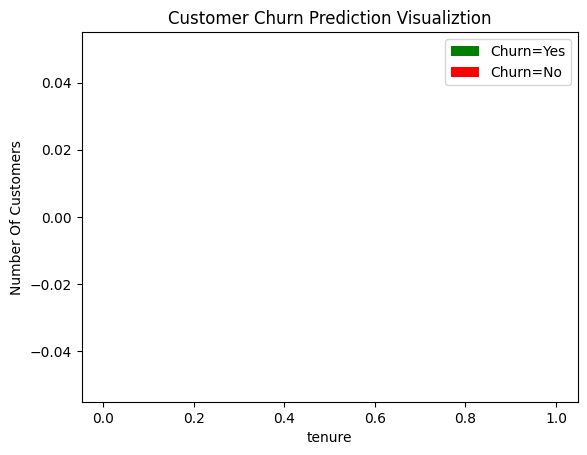

In [22]:
tenure_churn_no = df2[df2.Churn=='No'].tenure
tenure_churn_yes = df2[df2.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [23]:
df2['gender'].replace({'Male':1,'Female':0},inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\3414205951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['gender'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\vivek\AppData\Local\Temp\ipykernel_26296\3414205951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['gender'].re

In [24]:
df2.tail(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7040,0,0,1,1,0.140845,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,0.042254,1,1,0,0,0,...,True,False,False,False,True,False,False,False,False,True
7042,1,0,0,0,0.915493,1,0,1,0,1,...,False,False,True,False,True,False,True,False,False,False


In [25]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [26]:
df2.shape

(7032, 27)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(22, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fix the data types of X_train and y_train
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Fit the model
model.fit(X_train, y_train, epochs=100)

# Fix the data types of X_test and y_test
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Evaluate the model on the test data
model.evaluate(X_test, y_test)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5029 - accuracy: 0.7596
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8005
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4007 - accura

[0.7305186986923218, 0.7569296360015869]

In [36]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.7569


[0.7305186986923218, 0.7569296360015869]

In [37]:
yp=model.predict(X_test)
yp[0:5]

44/44 [==============================] - 0s 1ms/step


array([[5.9353524e-01],
       [2.4777173e-01],
       [8.3423100e-07],
       [9.1209131e-01],
       [6.0952276e-01]], dtype=float32)

In [38]:
y_test

2660    0.0
744     0.0
5579    1.0
64      1.0
3287    1.0
       ... 
2024    0.0
4396    1.0
4081    1.0
1297    0.0
4899    1.0
Name: Churn, Length: 1407, dtype: float32

In [39]:
y_pred=[]
for element in yp:
    if element>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
y_pred[0:10]

[1, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       999
         1.0       0.60      0.50      0.54       408

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Text(95.72222222222221, 0.5, 'truth')

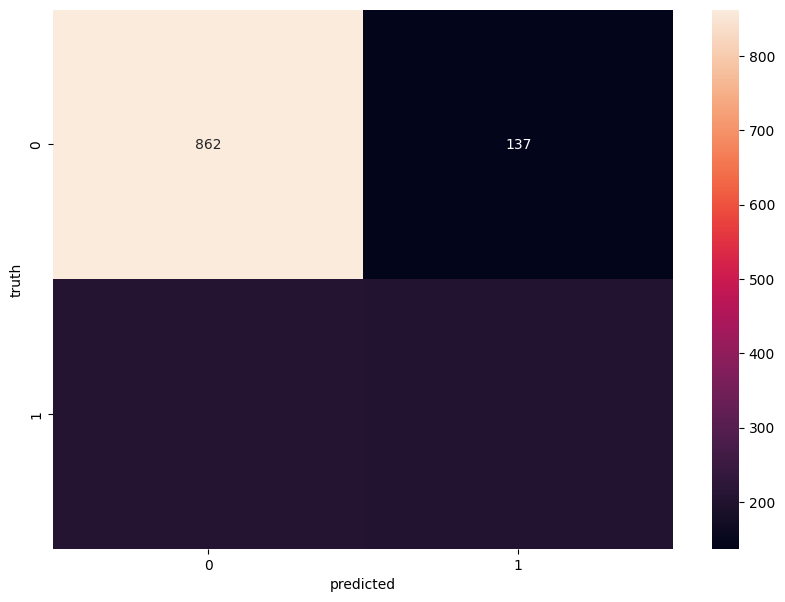

In [42]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [43]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model=keras.Sequential([ 
    keras.layers.Dense(26,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
        
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(X_test,y_test))   
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    print("Classification_report: ",classification_report(y_test,y_pred))
    return y_pred

In [44]:
y_pred=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4639 - accuracy: 0.7806
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8050
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8053
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8100
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8108
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8105
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4023 - accura

In [45]:
class_count_0,class_count_1=df2.Churn.value_counts()
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [46]:
class_count_0,class_count_1

(5163, 1869)

In [47]:
df_class_0.shape

(5163, 27)

In [48]:
df_class_0.sample(class_count_1).shape

(1869, 27)

In [49]:
df_class_0_under=df_class_0.sample(class_count_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
print(df_test_under.Churn.value_counts())

Churn
0    1869
1    1869
Name: count, dtype: int64


In [50]:
X=df_test_under.drop('Churn',axis='columns')
y=df_test_under.Churn

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [52]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [53]:
X_train.shape

(2990, 26)

In [54]:
y_train.shape

(2990,)

In [55]:
X_test.shape

(748, 26)

In [57]:
# Fix the data types of X_train, X_test, y_train, and y_test
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Call the ANN function with the fixed data types
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6485 - accuracy: 0.6361
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7452
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7652
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7699
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7722
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7773
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7766
Epoch 11/

In [58]:
df_class_1_over=df_class_1.sample(class_count_0,replace=True)
df_test_over=pd.concat([df_class_1_over,df_class_0],axis=0)
print(df_test_over.Churn.value_counts())

Churn
1    5163
0    5163
Name: count, dtype: int64


In [59]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [60]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [61]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [63]:
# Convert X_train, X_test, y_train, and y_test to float32 if they contain integer values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Call the ANN function with the fixed data types
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5615 - accuracy: 0.7125
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7553
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7592
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7621
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7625
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7700
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7668
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7711
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7717
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4627 - accura

In [64]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 558.5 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 717.5 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.0 kB 953.7 kB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [67]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [69]:
# Convert X_train, X_test, y_train, and y_test to float32 if they contain integer values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Call the ANN function with the fixed data types
y_preds = ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.7134
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7581
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.7621
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7645
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7631
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7654
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7707
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7703
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7742
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4649 - accura

Therefore our model is train with high f1-score for minority equal to 0.81 and accuracy almost 80%.